In [287]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib 

### Exploaring the data

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Data PreProcessing (1)

In [7]:
df.columns[df.isna().any()]

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

in non-categorical columns (continous values) replace null values by mean

In [9]:
df ['LoanAmount'] = df ['LoanAmount'].fillna(df['LoanAmount'].mean())
df ['Loan_Amount_Term'] = df ['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

in categorical columns replace null values with the mode

In [10]:
df ['Credit_History'] = df ['Credit_History'].fillna(df['Credit_History'].mode()[0])
df ['Gender'] = df ['Gender'].fillna(df['Gender'].mode()[0])
df ['Married'] = df ['Married'].fillna(df['Married'].mode()[0])
df ['Dependents'] = df ['Dependents'].fillna(df['Dependents'].mode()[0])
df ['Self_Employed'] = df ['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

why not droping those null columns?<br>
because our dataset is too small so dropping some rows will affect negativily on the model as the model needs a lot of data to give decent accuracy

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Some Analysis for better understanding to the data  

In [12]:
print(df.Gender.value_counts())
print("-"*50)
print(df.Dependents.value_counts())
print("-"*50)
print(df.Self_Employed.value_counts())
print("-"*50)
print(df.Property_Area.value_counts())
print("-"*50)
print(df.Married.value_counts())
print("-"*50)
print(df.Education.value_counts())

Male      502
Female    112
Name: Gender, dtype: int64
--------------------------------------------------
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------------------------------------------------
No     532
Yes     82
Name: Self_Employed, dtype: int64
--------------------------------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
--------------------------------------------------
Yes    401
No     213
Name: Married, dtype: int64
--------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


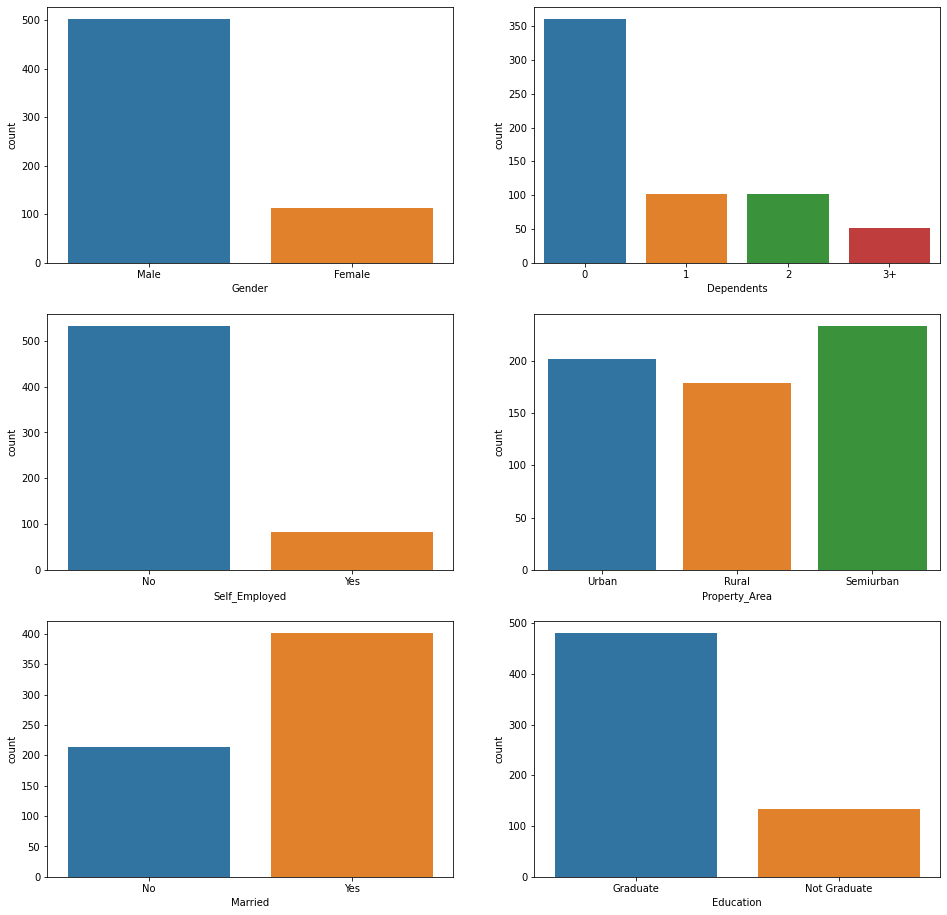

In [13]:
plt.figure(figsize=(16,16))
plt.subplot(3,2,1)
sns.countplot(x='Gender', data=df);

plt.subplot(3,2,2)
sns.countplot(x='Dependents', data=df);

plt.subplot(3,2,3)
sns.countplot(x='Self_Employed', data=df);

plt.subplot(3,2,4)
sns.countplot(x='Property_Area', data=df);

plt.subplot(3,2,5)
sns.countplot(x='Married', data=df);

plt.subplot(3,2,6)
sns.countplot(x='Education', data=df);

In [14]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

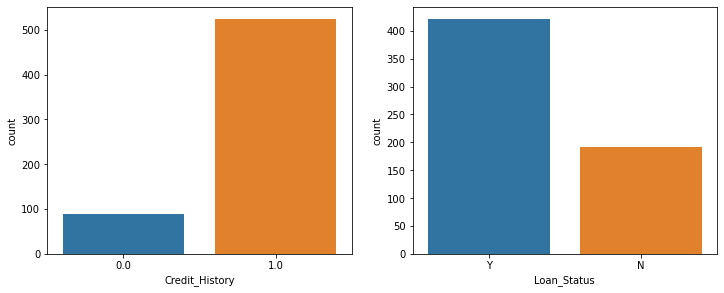

In [15]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.countplot(x='Credit_History', data=df)
plt.subplot(2,2,2)
sns.countplot(x = 'Loan_Status', data=df);

<AxesSubplot:xlabel='Education', ylabel='count'>

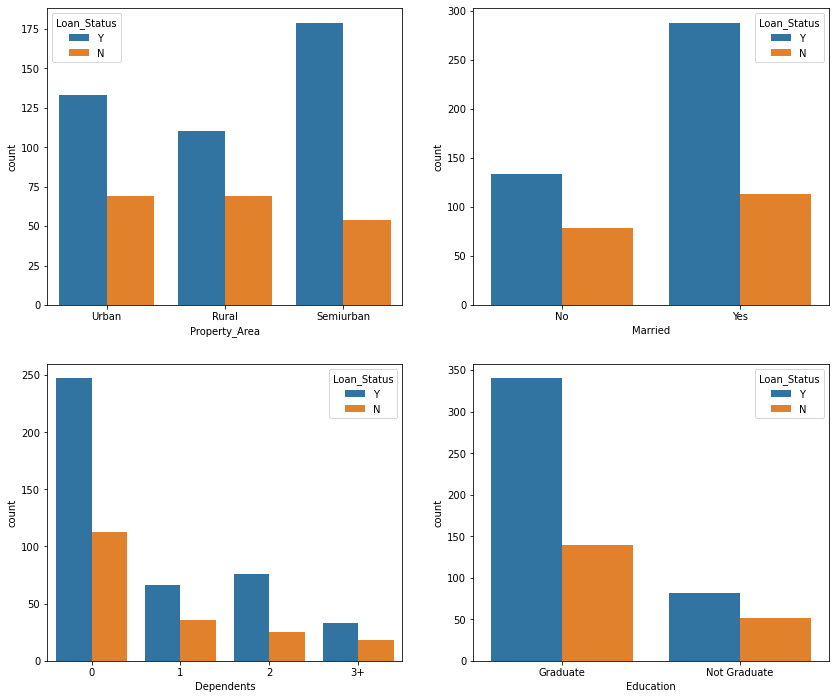

In [16]:
plt.figure(figsize=(14,12))

plt.subplot(2,2,1)
sns.countplot(x = 'Property_Area', hue='Loan_Status', data=df)
plt.subplot(2,2,2)
sns.countplot(x='Married', hue='Loan_Status', data=df)
plt.subplot(2,2,3)
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
plt.subplot(2,2,4)
sns.countplot(x='Education', hue='Loan_Status', data=df)

- Semiurban seems to be the most property area in which they ask for loans and accept a lot. It seems that this royal area is poor or something.<br>
- Married people apply for loans and accept more than singles
- Graduateed Pepole are more likely to apply for loans 

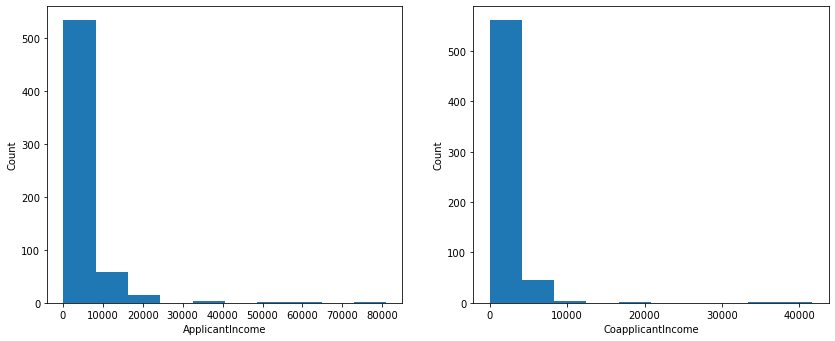

In [17]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.hist(df.ApplicantIncome);
plt.subplot(2,2,2)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Count')
plt.hist(df.CoapplicantIncome);

most of the ApplicantIncome values in the data between (0-15000) <br>
most of the CoapplicantIncome values in the data between (0-9000)

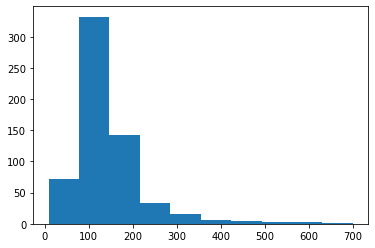

In [18]:
plt.hist(df.LoanAmount);

Most requested amounts between (100k - 200k)

### Data Preprocessing (2)

In [19]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [20]:
df2 = df.drop('Loan_ID', axis=1) # drop loan ID as it is not an important Feature

In [21]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


replace the binary features with 0's and 1's

In [22]:
df3 = df2.copy()
df3.Gender = df3.Gender.apply(lambda x: 1 if x=='Male' else 0)
df3.Married = df3.Married.apply(lambda x: 1 if x=='Yes' else 0)
df3.Education = df3.Education.apply(lambda x: 1 if x=='Graduate' else 0)
df3.Self_Employed = df3.Self_Employed.apply(lambda x: 1 if x=='Yes' else 0)
df3.Loan_Status = df3.Loan_Status.apply(lambda x: 1 if x=='Y' else 0)

In [23]:
df3.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


apply one hot encoder on Property_Area

In [24]:
dummies = pd.get_dummies(df.Property_Area)
dummies

,Rural,Semiurban,Urban
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [25]:
df4 = pd.concat([df3, dummies], axis=1)
df4.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Rural,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1,0,0,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0,1,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1,0,0,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1,0,0,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1,0,0,1


In [26]:
df4.drop(['Property_Area', 'Urban'], axis=1, inplace=True)
df4.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,0
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0


In [27]:
df4.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,0.017987,0.080283,-0.108623
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.091478,-0.006805,0.005845
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,0.085884,-0.077520,0.039410
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.003700,0.022065,0.008710
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.004710,0.015829,-0.014246
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.059187,0.005329,-0.027044
LoanAmount,0.107930,0.147141,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.036416,0.043178,-0.008273
Loan_Amount_Term,-0.073567,-0.100863,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.020974,0.034433,0.061365
Credit_History,0.009170,0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.540556,-0.020906,0.035976
Loan_Status,0.017987,0.091478,0.085884,-0.003700,-0.004710,-0.059187,-0.036416,-0.020974,0.540556,1.000000,-0.100694,0.136540


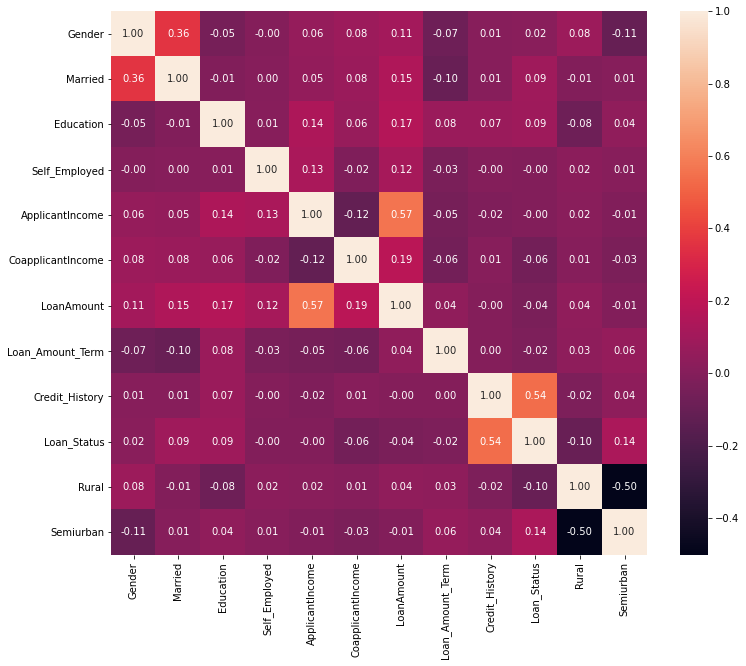

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df4.corr(), annot=True, fmt='.2f');

sum the income columns into 1 column

In [29]:
df5 = df4.copy()

adding ApplicantIncome and CoapplicantIncome into one column

In [121]:
df5['Total'] = df5['ApplicantIncome'] + df5['CoapplicantIncome']
df5.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Total
0,1,0,0,1,0,146.412162,360.0,1.0,1,0,0,5849.0
1,1,1,1,1,0,128.000000,360.0,1.0,0,1,0,6091.0
2,1,1,0,1,1,66.000000,360.0,1.0,1,0,0,3000.0
3,1,1,0,0,0,120.000000,360.0,1.0,1,0,0,4941.0
4,1,0,0,1,0,141.000000,360.0,1.0,1,0,0,6000.0


In [122]:
df5.groupby('Loan_Status').mean()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Total
Loan_Status,,,,,,,,,,,
0,0.807292,0.588542,0.822917,0.729167,0.135417,150.945488,344.000000,0.572917,0.359375,0.281250,7323.885417
1,0.822275,0.682464,0.829384,0.805687,0.132701,144.349606,341.090047,0.983412,0.260664,0.424171,6888.585118


In [123]:
df5.Dependents.value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [124]:
df5.Dependents.dtypes

dtype('int64')

In [125]:
df5.Dependents = df5.Dependents.replace(to_replace='3+', value=4)
df5.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Total
0,1,0,0,1,0,146.412162,360.0,1.0,1,0,0,5849.0
1,1,1,1,1,0,128.000000,360.0,1.0,0,1,0,6091.0
2,1,1,0,1,1,66.000000,360.0,1.0,1,0,0,3000.0
3,1,1,0,0,0,120.000000,360.0,1.0,1,0,0,4941.0
4,1,0,0,1,0,141.000000,360.0,1.0,1,0,0,6000.0


In [126]:
df5.Dependents.value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [127]:
df5.Dependents.dtypes

dtype('int64')

In [128]:
df5.Dependents = pd.to_numeric(df5.Dependents)

In [129]:
df5.Dependents.dtypes

dtype('int64')

In [130]:
df5.corr()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Rural,Semiurban,Total
Gender,1.000000,0.364569,0.165877,-0.045364,-0.000525,0.107930,-0.073567,0.009170,0.017987,0.080283,-0.108623,0.093191
Married,0.364569,1.000000,0.308408,-0.012304,0.004489,0.147141,-0.100863,0.010938,0.091478,-0.006805,0.005845,0.083319
Dependents,0.165877,0.308408,1.000000,-0.059001,0.048028,0.170666,-0.101674,-0.047203,0.002474,0.008583,0.003392,0.142580
Education,-0.045364,-0.012304,-0.059001,1.000000,0.010383,0.166998,0.077242,0.073658,0.085884,-0.077520,0.039410,0.161362
Self_Employed,-0.000525,0.004489,0.048028,0.010383,1.000000,0.115260,-0.033943,-0.001550,-0.003700,0.022065,0.008710,0.113000
LoanAmount,0.107930,0.147141,0.170666,0.166998,0.115260,1.000000,0.038801,-0.001431,-0.036416,0.043178,-0.008273,0.620102
Loan_Amount_Term,-0.073567,-0.100863,-0.101674,0.077242,-0.033943,0.038801,1.000000,0.000432,-0.020974,0.034433,0.061365,-0.069830
Credit_History,0.009170,0.010938,-0.047203,0.073658,-0.001550,-0.001431,0.000432,1.000000,0.540556,-0.020906,0.035976,-0.012563
Loan_Status,0.017987,0.091478,0.002474,0.085884,-0.003700,-0.036416,-0.020974,0.540556,1.000000,-0.100694,0.136540,-0.031271
Rural,0.080283,-0.006805,0.008583,-0.077520,0.022065,0.043178,0.034433,-0.020906,-0.100694,1.000000,-0.501646,0.017387


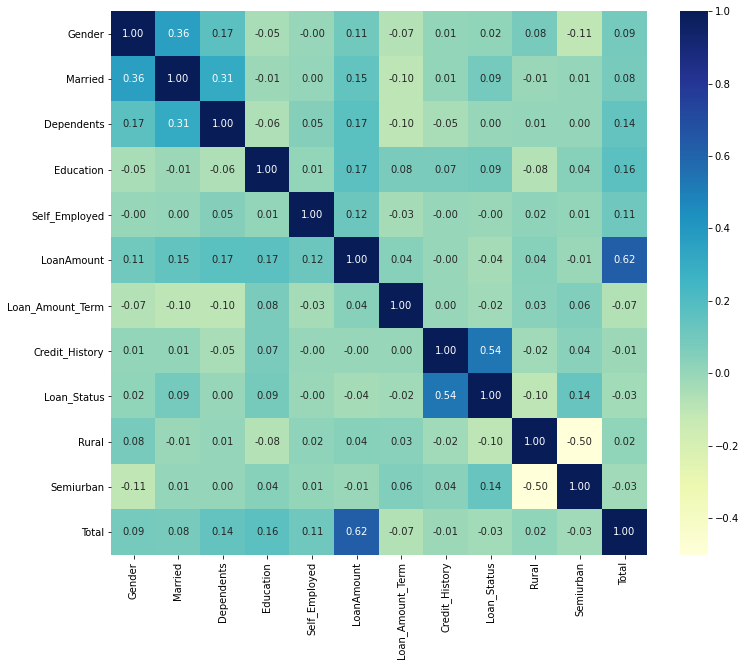

In [131]:
plt.figure(figsize=(12,10))
sns.heatmap(df5.corr(), annot=True, fmt='.2f', cmap='YlGnBu');

#### Assign Feature and target variables

In [132]:
X = df5.drop(['Loan_Status'], axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Rural,Semiurban,Total
0,1,0,0,1,0,146.412162,360.0,1.0,0,0,5849.0
1,1,1,1,1,0,128.000000,360.0,1.0,1,0,6091.0
2,1,1,0,1,1,66.000000,360.0,1.0,0,0,3000.0
3,1,1,0,0,0,120.000000,360.0,1.0,0,0,4941.0
4,1,0,0,1,0,141.000000,360.0,1.0,0,0,6000.0


In [133]:
y = df5.Loan_Status

#### Splitting the data into Training and Teting data

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=205)

In [283]:
len(X_train)

460

In [284]:
len(X_test)

154

### Bulding and Training the model

In [285]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [286]:
model.score(X_test, y_test)

0.8376623376623377

### Save the model

In [288]:
joblib.dump(model, 'Loan Prediction Model')

['Loan Prediction Model']